# Unlocking YouTube Channel Performance Secrets

import libraries

In [18]:
!pip install isodate

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score
import warnings 


warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

In [4]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [5]:
df.tail()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29
363,363,1875.0,2024-10-18 00:00:00,23,18,10,2024,Friday,1.600,1791.0,...,0.0,0.0,40.26,755.0,3890.0,816.1554,-3.0,5.915,43431.0,6.67


In [6]:
df.shape

(364, 70)

In [7]:
df.describe()

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000


In [10]:
df.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [11]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

## 3. Data Cleaning
## Handle Missing Values:

In [12]:
# Fill or drop null values
df = df.dropna() # Drop rows with missing values (for simplicity)

In [15]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [22]:

# Convert 'Video Duration' into seconds
#import isodate
#df['Video Duration'] = df['Video Duration'].astype(str).apply(lambda x:isodate.parse_duration(x).total_seconds())

Task
Analyze the data in the dataframe df by performing exploratory data analysis (EDA). Display the first few rows, check data types, look for missing values, generate descriptive statistics, visualize distributions and relationships, calculate correlations, and identify outliers. Summarize the findings and suggest next steps

## Understand the data

### Subtask:
Display the first few rows, check the data types and look for missing values.


## Summarize the data

### Subtask:
Generate descriptive statistics for numerical and categorical features.


In [24]:
# Generate descriptive statistics for numerical columns
display(df.describe())

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000


In [25]:
# Generate descriptive statistics for categorical columns
display(df.describe(include='object'))

,Video Publish Time,Day of Week
count,364,364
unique,357,7
top,2017-03-24 00:00:00,Sunday
freq,2,63




```
# This is formatted as code
```

## Visualize the data

### Subtask:
Create visualizations to understand the distribution of individual features and the relationships between features.


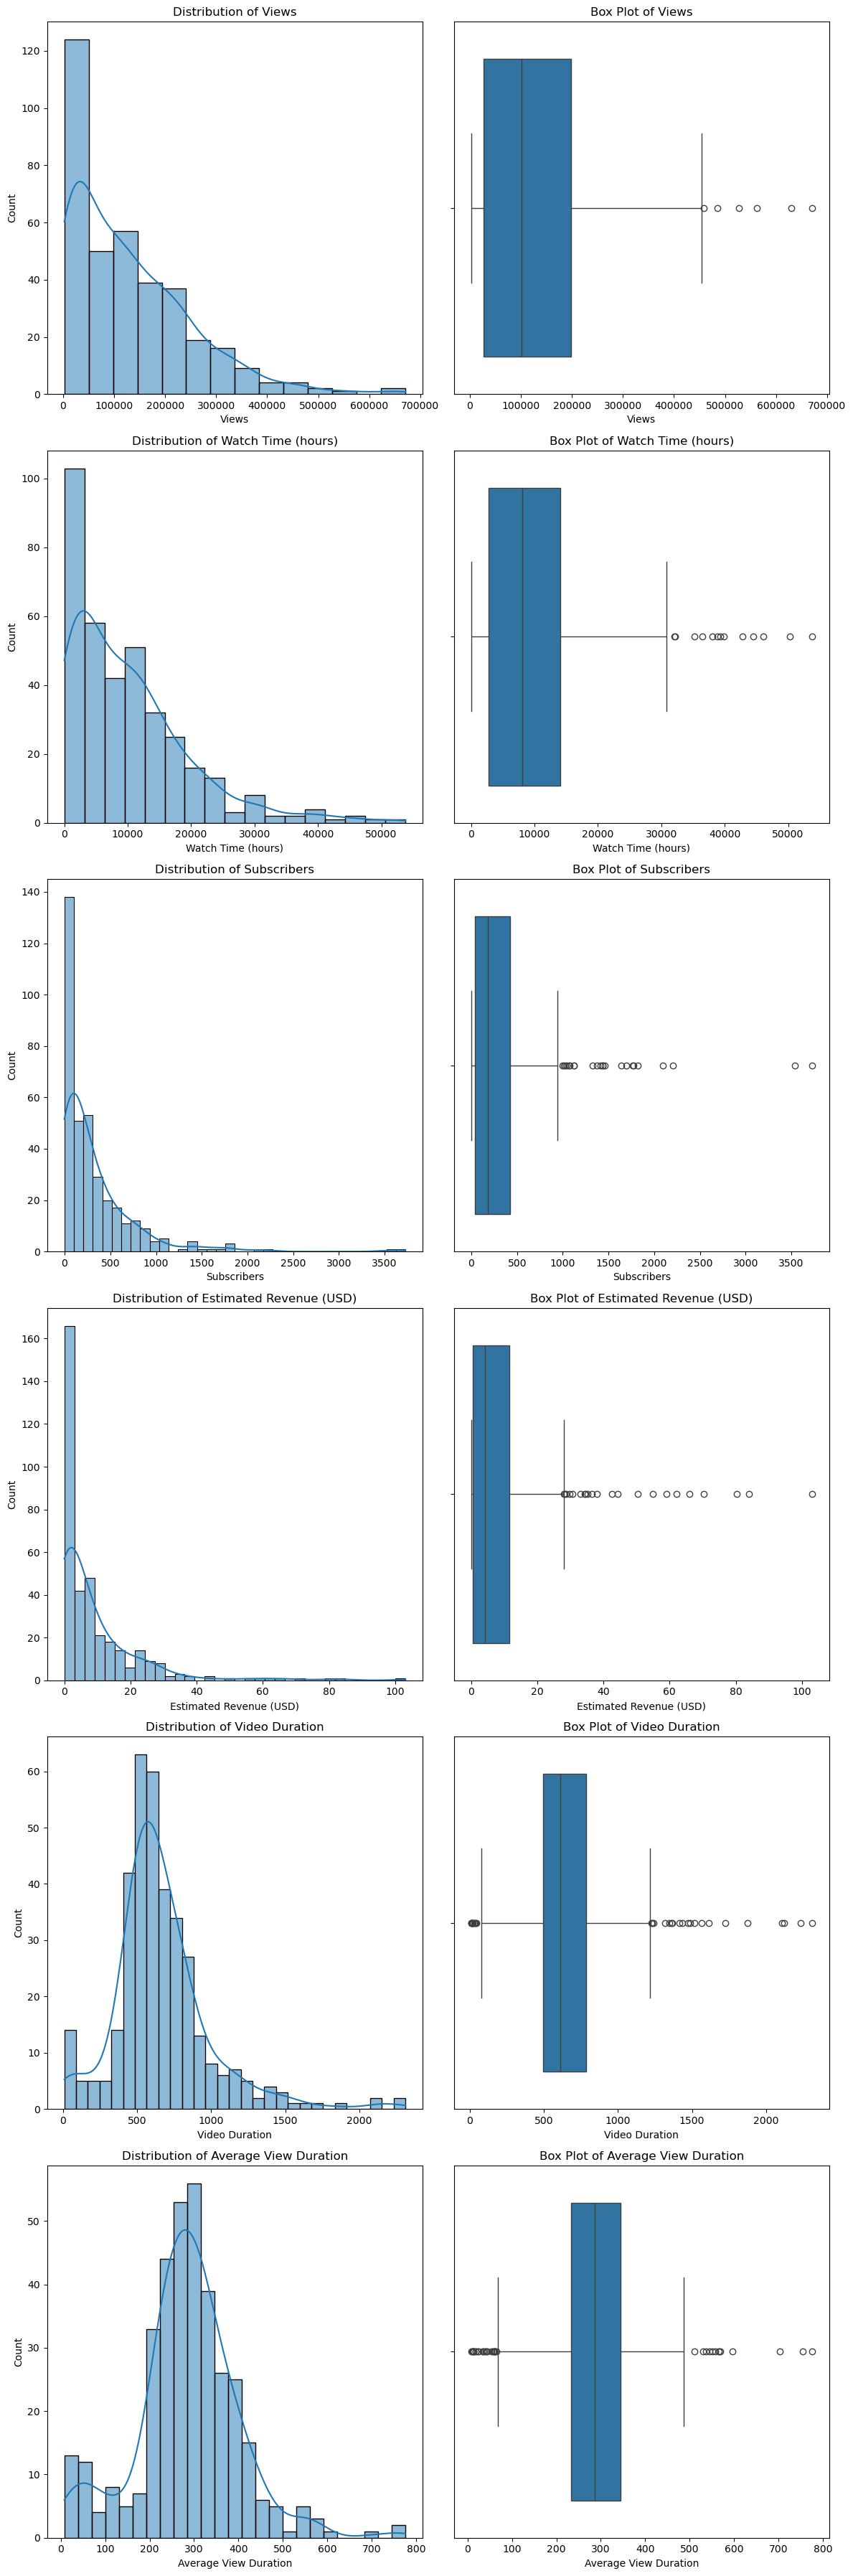

In [27]:
numerical_features = ['Views', 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Video Duration', 'Average View Duration']
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(12, 6 * len(numerical_features)))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Distribution of {col}')
    sns.boxplot(x=df[col], ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

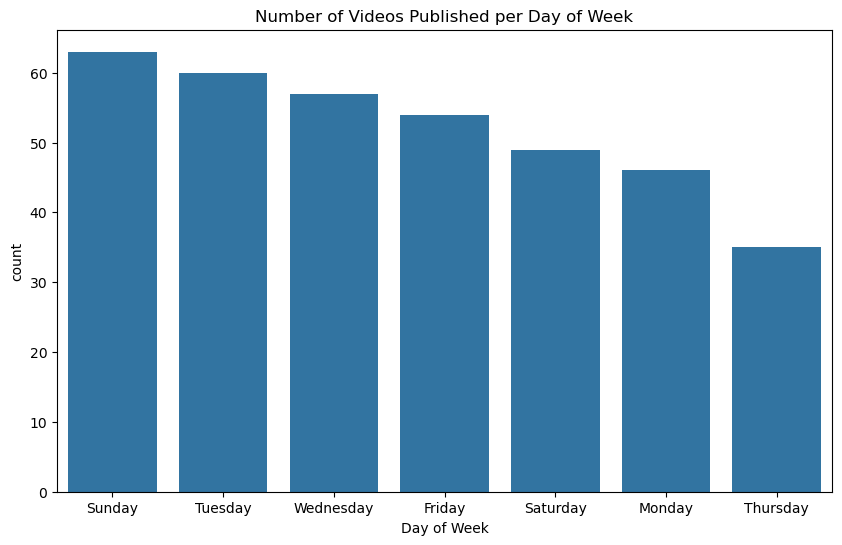

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df, order=df['Day of Week'].value_counts().index)
plt.title('Number of Videos Published per Day of Week')
plt.show()

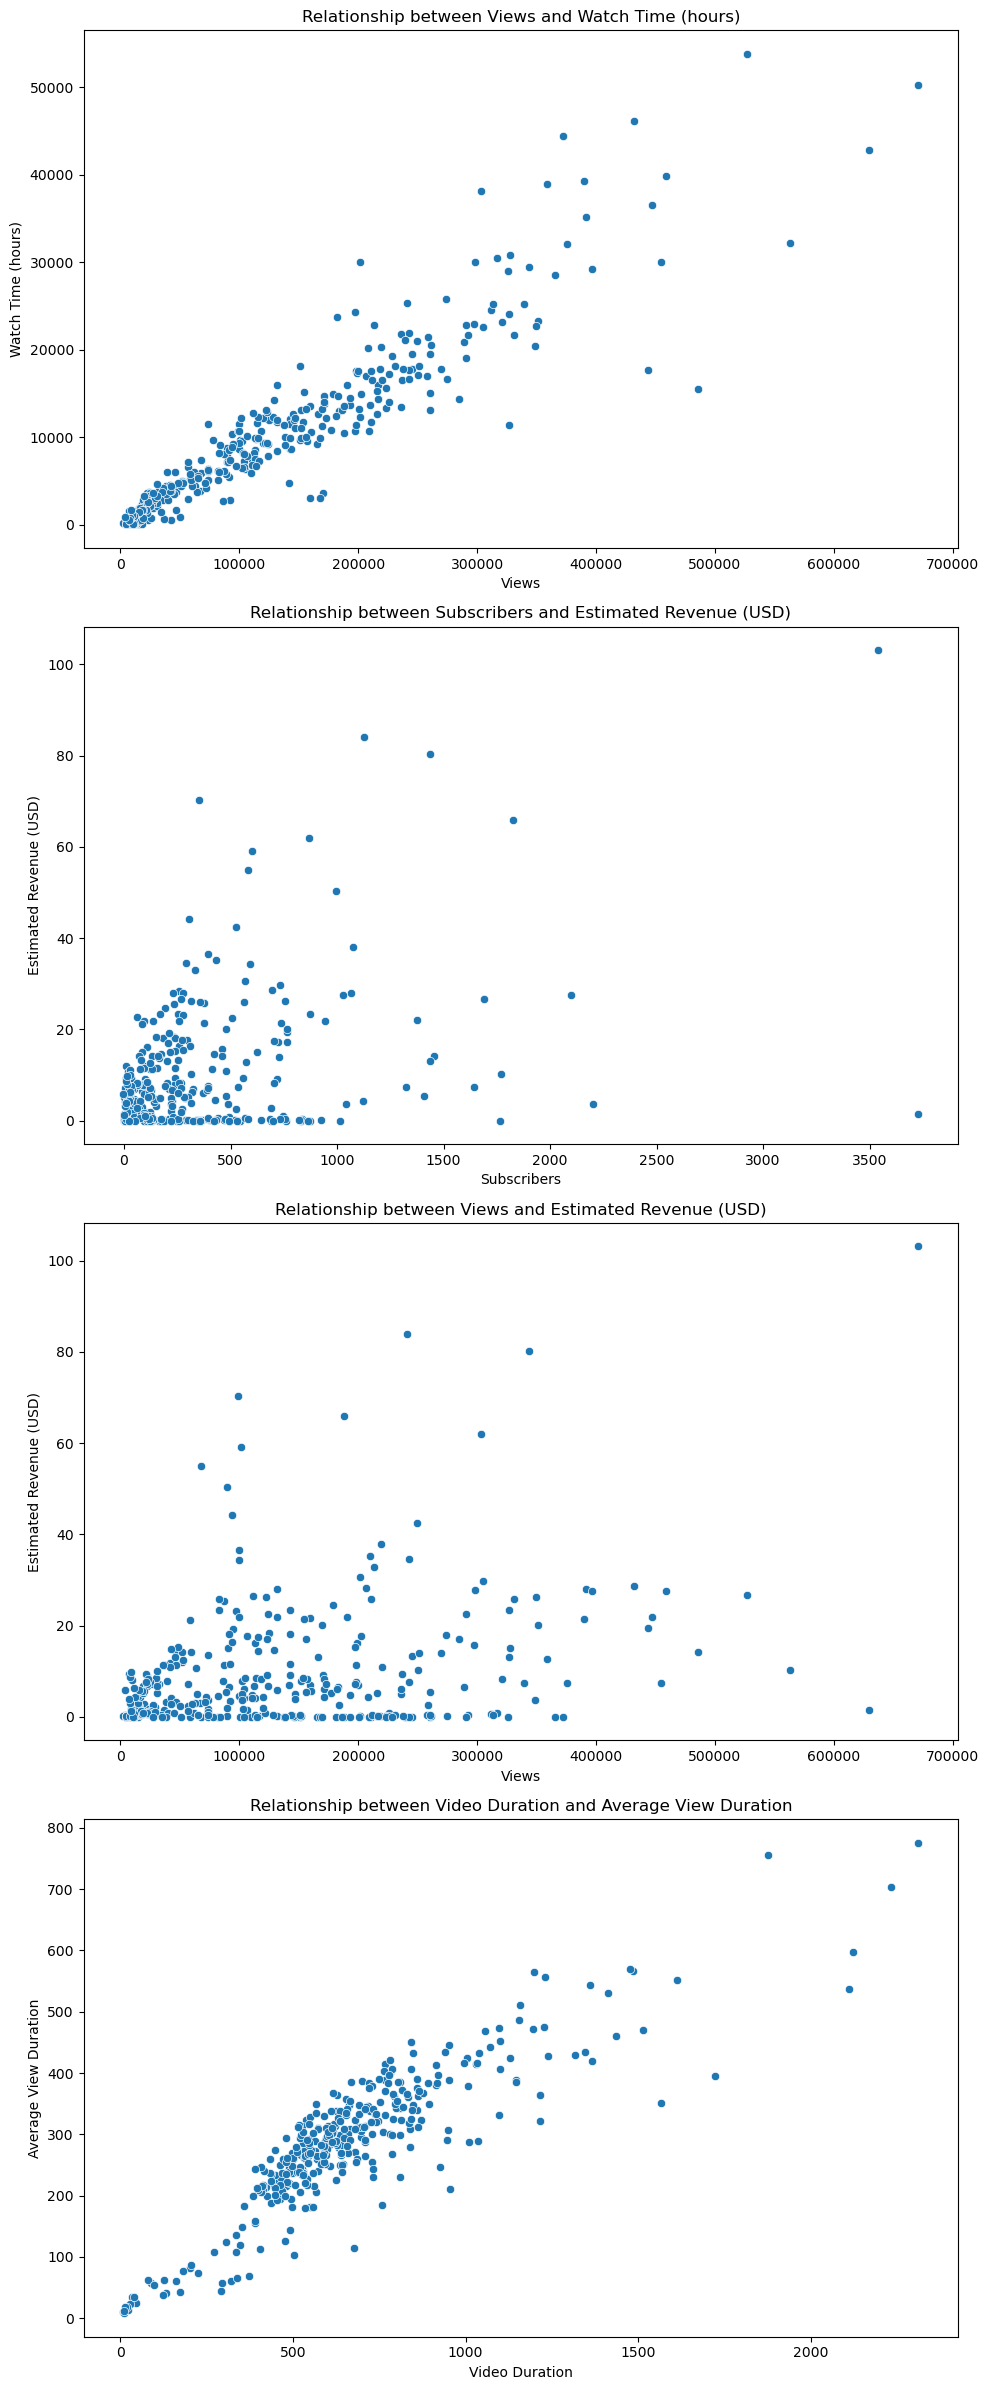

In [29]:
numerical_pairs = [('Views', 'Watch Time (hours)'), ('Subscribers', 'Estimated Revenue (USD)'), ('Views', 'Estimated Revenue (USD)'), ('Video Duration', 'Average View Duration')]
fig, axes = plt.subplots(nrows=len(numerical_pairs), ncols=1, figsize=(10, 6 * len(numerical_pairs)))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(numerical_pairs):
    sns.scatterplot(x=x_col, y=y_col, data=df, ax=axes[i])
    axes[i].set_title(f'Relationship between {x_col} and {y_col}')

plt.tight_layout()
plt.show()

*italicized text*## Explore correlations

### Subtask:
Calculate and visualize the correlation matrix to identify relationships between numerical features.


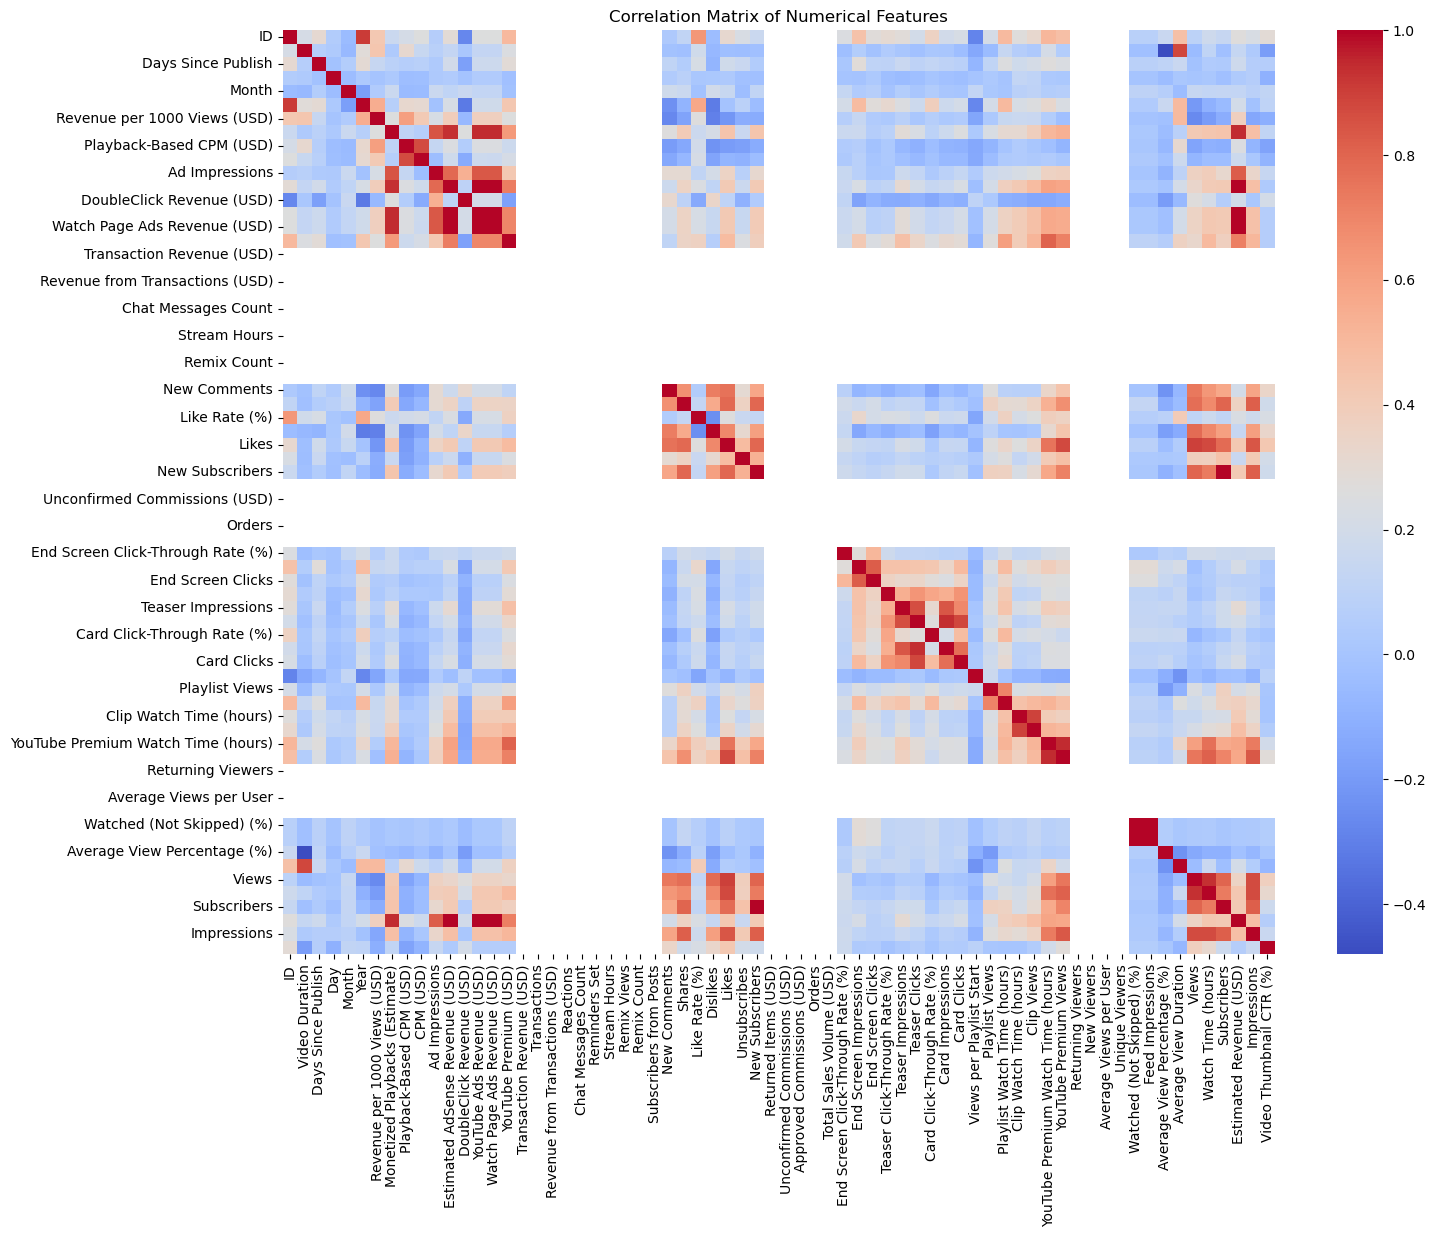

In [30]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Identify outliers

### Subtask:
Use visualizations or statistical methods to detect outliers in the data.


In [32]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [33]:
# Calculate and print outliers using IQR for each numerical column
print("Outlier Analysis using IQR:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers found.")

Outlier Analysis using IQR:
Column 'ID': 0 outliers found.
Column 'Video Duration': 32 outliers found.
Column 'Days Since Publish': 43 outliers found.
Column 'Day': 0 outliers found.
Column 'Month': 0 outliers found.
Column 'Year': 0 outliers found.
Column 'Revenue per 1000 Views (USD)': 26 outliers found.
Column 'Monetized Playbacks (Estimate)': 14 outliers found.
Column 'Playback-Based CPM (USD)': 11 outliers found.
Column 'CPM (USD)': 4 outliers found.
Column 'Ad Impressions': 26 outliers found.
Column 'Estimated AdSense Revenue (USD)': 26 outliers found.
Column 'DoubleClick Revenue (USD)': 56 outliers found.
Column 'YouTube Ads Revenue (USD)': 19 outliers found.
Column 'Watch Page Ads Revenue (USD)': 19 outliers found.
Column 'YouTube Premium (USD)': 22 outliers found.
Column 'Transaction Revenue (USD)': 0 outliers found.
Column 'Transactions': 0 outliers found.
Column 'Revenue from Transactions (USD)': 0 outliers found.
Column 'Reactions': 0 outliers found.
Column 'Chat Messages C

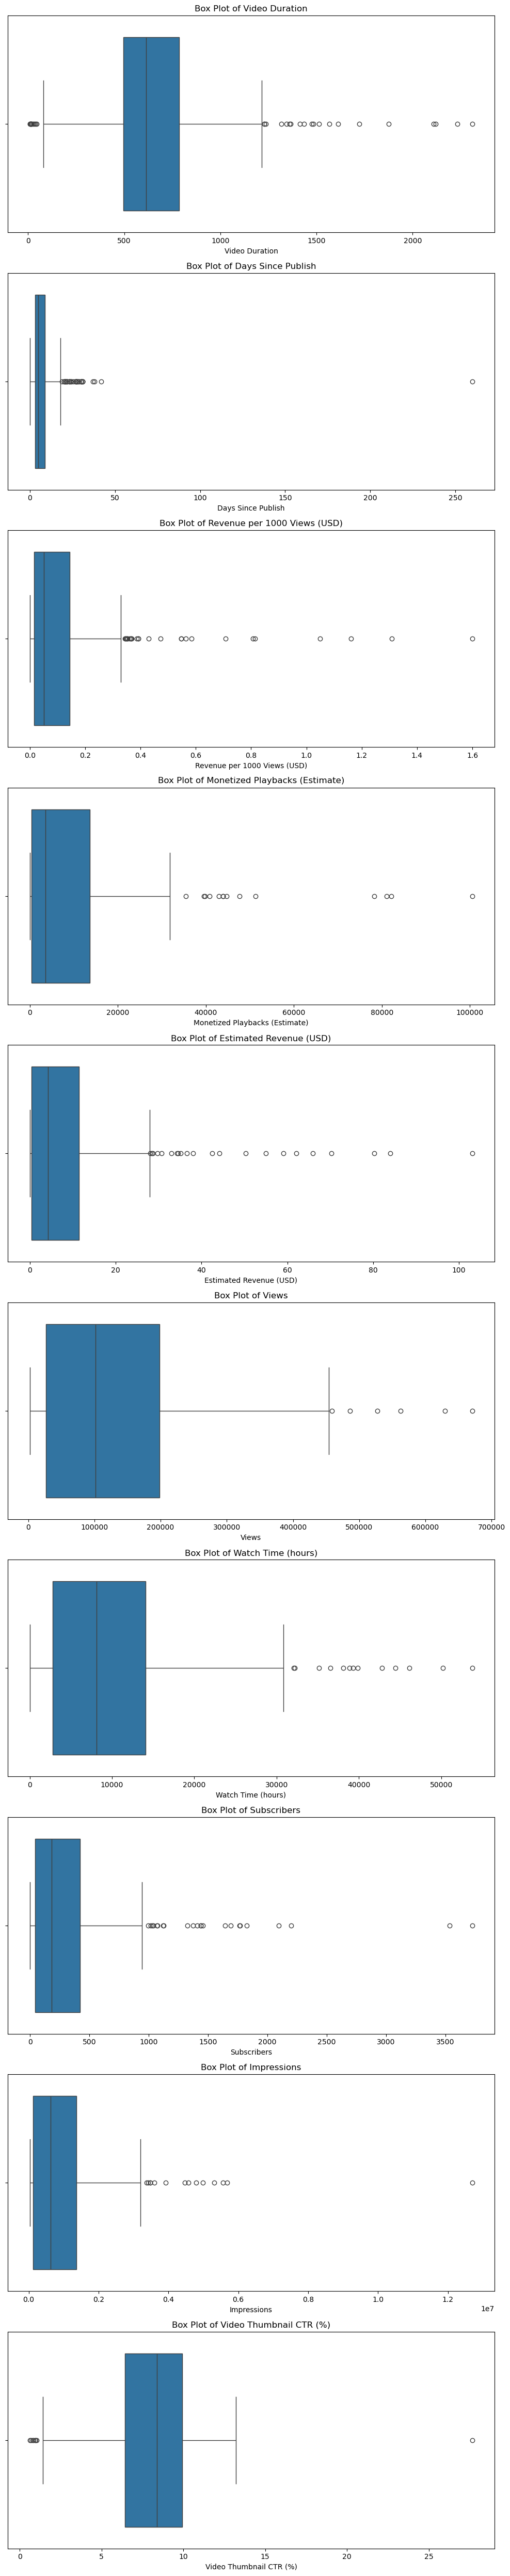

In [34]:
# Create box plots for a selection of numerical columns with outliers
cols_with_outliers = ['Video Duration', 'Days Since Publish', 'Revenue per 1000 Views (USD)',
                      'Monetized Playbacks (Estimate)', 'Estimated Revenue (USD)', 'Views',
                     'Watch Time (hours)', 'Subscribers', 'Impressions', 'Video Thumbnail CTR (%)']

fig, axes = plt.subplots(nrows=len(cols_with_outliers), ncols=1, figsize=(10, 5 * len(cols_with_outliers)))
axes = axes.flatten()

for i, col in enumerate(cols_with_outliers):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains columns with numerical data such as 'Views', 'Watch Time (hours)', 'Subscribers', and 'Estimated Revenue (USD)', as well as categorical data like 'Day of Week'.
*   No missing values were found in the dataset.
*   Descriptive statistics revealed the central tendency, spread, and shape of the numerical features. For categorical features, the counts of unique values and the most frequent categories were identified.
*   Visualizations showed that several numerical features, including 'Views', 'Watch Time (hours)', 'Subscribers', and 'Estimated Revenue (USD)', have right-skewed distributions.
*   There is a strong positive correlation between 'Views', 'Watch Time (hours)', 'Subscribers', and 'Estimated Revenue (USD)'.
*   Outlier analysis using the IQR method and box plots identified a significant number of outliers in several numerical columns, notably 'Teaser Impressions' (83 outliers), 'DoubleClick Revenue (USD)' (56 outliers), 'Clip Views' (53 outliers), and 'End Screen Clicks' (47 outliers).

### Insights or Next Steps

*   The strong correlations between key metrics suggest potential drivers for channel growth and revenue. Further analysis could explore the causal relationships.
*   The presence of outliers in several numerical features indicates the need for outlier handling techniques, such as removal or transformation, before building predictive models.
